In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from vega_datasets import data

# SF Temps

In [2]:
df = data.sf_temps()
df.index = df.date
del df['date']

Use the above dataset for the exercises below:
1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

## #1

<AxesSubplot:xlabel='date'>

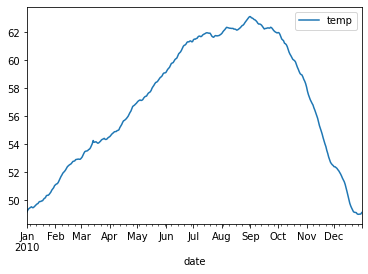

In [3]:
# daily mean temp, visualize
daily_mean = df.resample('D').mean()
daily_mean.plot()

## #2

<AxesSubplot:xlabel='date'>

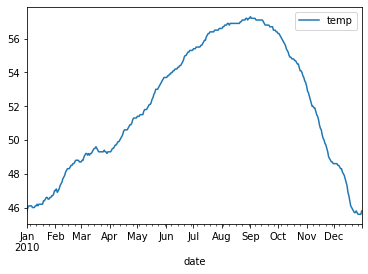

In [4]:
# visualize min temp over time
daily_min = df.resample('D').min()
daily_min.plot()

## #3

<AxesSubplot:xlabel='date'>

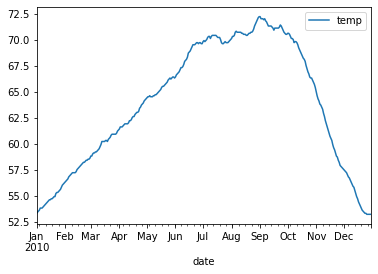

In [5]:
# visualize max temp over time
daily_max = df.resample('D').max()
daily_max.plot()

## #4

Coldest month: 1


<AxesSubplot:xlabel='date'>

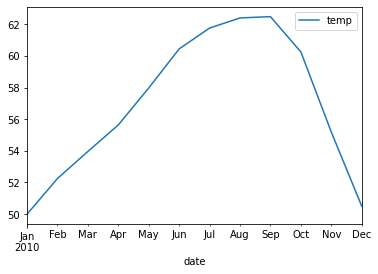

In [6]:
# which month is coldest on average?
monthly_min = df.resample('M').mean()
print("Coldest month:", monthly_min.temp.sort_values().head(1).index.month.item())
monthly_min.plot()

## #5

Warmest month: 9


<AxesSubplot:xlabel='date'>

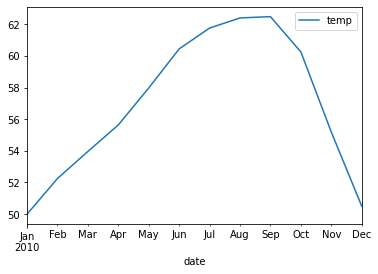

In [7]:
# which month is warmest on average?
monthly_max = df.resample('M').mean()
print("Warmest month:", monthly_min.temp.sort_values(ascending=False).head(1).index.month.item())
monthly_max.plot()

## #6

<AxesSubplot:xlabel='date'>

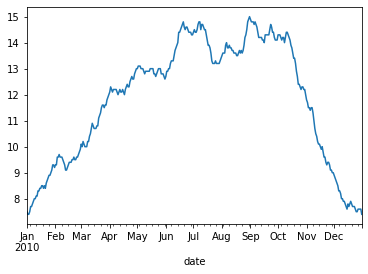

In [8]:
# change in temp by day
daily_change = df.resample('D').agg(['min','max'])
daily_change['change'] = daily_change[('temp', 'max')] - daily_change[('temp', 'min')]
daily_change['change'].plot()

Most-variable month: 9


<AxesSubplot:xlabel='date'>

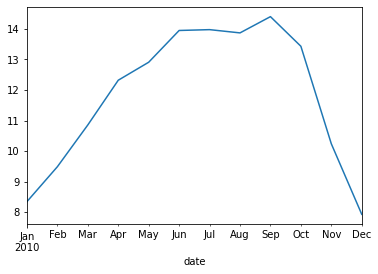

In [9]:
# Which month has the highest daily temperature variability?
monthly_change = daily_change.resample('M').mean()
print("Most-variable month:", monthly_change.change.sort_values(ascending=False).head(1).index.month.item())
monthly_change['change'].plot()

## #7

<AxesSubplot:xlabel='date'>

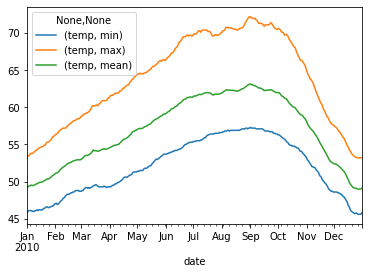

In [10]:
# visualize the daily min, average, and max temps on a plot
daily_overall = df.resample('D').agg(['min','max','mean'])
daily_overall.plot()

# Seattle Weather

In [11]:
df = data.seattle_weather()
df.index = df.date
del df['date']
df.head(2)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain


Use the dataset to answer the following questions:
1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

## #1

In [12]:
# year/month with most rainfall
monthly_rain = df.resample('M').precipitation.sum()
print('Most-rainy month:', str(monthly_rain.sort_values(ascending=False).head(1).index.item())[:7])

Most-rainy month: 2015-12


## #2

<AxesSubplot:xlabel='date'>

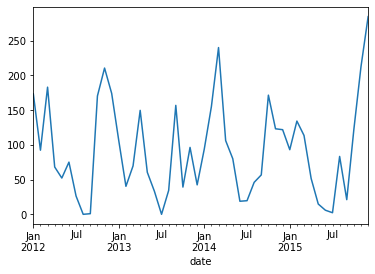

In [13]:
# visualize rainfall by month
monthly_rain.plot()

## #3

<AxesSubplot:xlabel='date'>

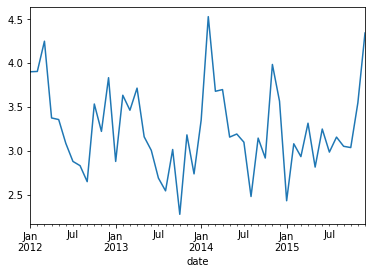

In [14]:
# amount of wind over time
monthly_wind = df.resample('M').wind.mean()
monthly_wind.plot()

## #4

In [15]:
# which year-month is windiest
print('Most-windy month:', str(monthly_wind.sort_values(ascending=False).head(1).index.item())[:7])

Most-windy month: 2014-02


## #5

In [16]:
# which year had the must sunshine?
df['is_sunshine'] = df['weather'] == 'sun'
df['is_sunshine'] = df['is_sunshine'].map({False:0, True:1})
yearly_sun = df.resample('Y').is_sunshine.sum()
print("Year with most sunshine:", yearly_sun.sort_values(ascending=False).head(1).index.year.item())

Year with most sunshine: 2014


## #6

In [17]:
# Which month does it rain the most?
df['month'] = df.index.month
print("Month with most rain:",
      df.groupby('month').precipitation.sum().sort_values(ascending=False).head(1).index.item())

Month with most rain: 11


## #7

In [18]:
# Which month has most non-zero rain days?
df['rained'] = df['weather'] == 'rain'
df['rained'] = df['rained'].map({False:0, True:1})
print("Month with most rain days:",
    df.groupby('month').rained.sum().sort_values(ascending=False).head(1).index.item())

Month with most rain days: 2


# 20k Flights

In [19]:
df = data.flights_20k()
df.index = df.date
del df['date']
df.head(3)

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL


1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

## #1

In [20]:
# convert negative delays to zero
num = df._get_numeric_data()
num[num < 0] = 0
df.head(3)

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL


## #2

In [21]:
# hour with highest average delay
df['hour'] = df.index.hour
print("Hour with highest average delay:", 
      df.groupby('hour').delay.mean().sort_values(ascending=False).head(1).index.item())

Hour with highest average delay: 3


## #3

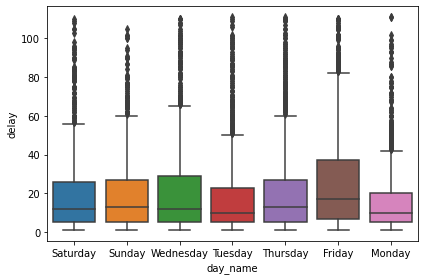

In [22]:
# is there a difference in average delay for any day of the week?
df['day_name'] = df.index.day_name()
q1, q3 = df.delay.quantile([.01,.99])
mask = (df.delay > q1) & (df.delay < q3)
# create boxplot showing each day's delay
sns.boxplot(df[mask]['day_name'], df[mask]['delay'])
plt.tight_layout()
plt.show()

$H_0$: Friday is not statistically higher in terms of delay than other days.

$H_a$: Friday is statistically higher in terms of delay than other days.

Confidence interval: 95%

In [23]:
# checking Friday statistically against all other days
alpha = .05
t, p = stats.mannwhitneyu(df[df.day_name == 'Friday']['delay'], 
                          df[df.day_name != 'Friday']['delay'],
                          alternative = 'greater')

if p < alpha:
    print('Friday has statistically significantly higher delay than other days of the week.\n\
            We reject the null hypothesis with 95% confidence.')
else:
    print('Test does not pass 95% confidence threshold, we accept the null hypothesis.')

Friday has statistically significantly higher delay than other days of the week.
            We reject the null hypothesis with 95% confidence.


Yes, there is a difference in delay between days. Friday specifically has higher delay than other days of the week.

## #4

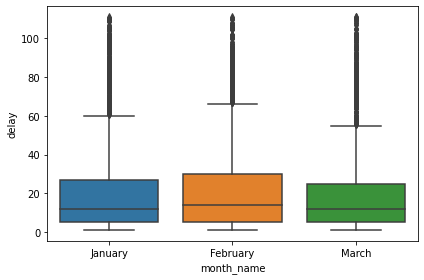

In [24]:
# is there a difference in average delay for any month in a year?
df['month_name'] = df.index.month_name()
q1, q3 = df.delay.quantile([.01,.99])
mask = (df.delay > q1) & (df.delay < q3)
# create boxplot showing each month's delay
sns.boxplot(df[mask]['month_name'], df[mask]['delay'])
plt.tight_layout()
plt.show()

$H_0$: February is not statistically higher in terms of delay than other months.

$H_a$: February is statistically higher in terms of delay than other months.

Confidence interval: 95%

In [25]:
# checking February statistically against all other days
alpha = .05
t, p = stats.mannwhitneyu(df[df.day_name == 'February']['delay'], 
                          df[df.day_name != 'February']['delay'],
                          alternative = 'greater')

if p < alpha:
    print('February has statistically significantly higher delay than other months in a year.\n\
            We reject the null hypothesis with 95% confidence.')
else:
    print('Test does not pass 95% confidence threshold, we accept the null hypothesis.')

Test does not pass 95% confidence threshold, we accept the null hypothesis.


No, there is no statistical difference in delay between months in a year.

# Iowa Electricity

In [26]:
df = data.iowa_electricity()
df.year = df.year.dt.year
df.index = df.year
del df['year']
df.head(2)

,source,net_generation
year,,
2001,Fossil Fuels,35361
2002,Fossil Fuels,35991


1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
    * How would you control for increasing consumption over time when considering how much energy is coming from each source?
    * express each number as a % of the year's total

## #1

In [27]:
# in percentages, each energy source's contribution to the year's energy production
year_sums = pd.DataFrame(df.groupby('year').net_generation.sum())
year_sums.columns = ['total_generated']
df = pd.merge(df, year_sums, on='year')
df['contribution'] = df['net_generation'] / df['total_generated']
df.head(2)

,source,net_generation,total_generated,contribution
year,,,,
2001,Fossil Fuels,35361,40651,0.869868
2001,Nuclear Energy,3853,40651,0.094782


## #2

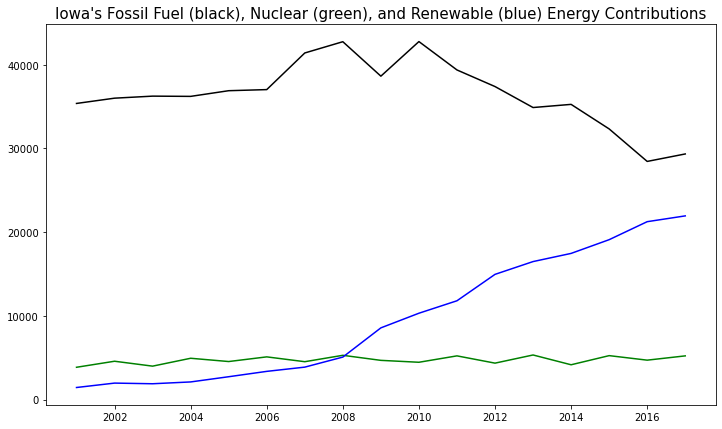

In [28]:
# visualize each source's generation over time
# create masks
mask1 = df.source == 'Fossil Fuels'
mask2 = df.source == 'Nuclear Energy'
mask3 = df.source == 'Renewables'

# plot each df
plt.figure(figsize=(12,7))
plt.plot(df[mask1].index, df[mask1].net_generation, c='black', )
plt.plot(df[mask2].index, df[mask2].net_generation, c='green')
plt.plot(df[mask3].index, df[mask3].net_generation, c='blue')
plt.title("Iowa's Fossil Fuel (black), Nuclear (green), and Renewable (blue) Energy Contributions", size=15)
plt.show()

## #3

In [29]:
# create a pivot table of year vs energy source in terms of net_generation
source_per_year = df.pivot_table(columns='year',index='source',values='net_generation')
source_per_year

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


## #4

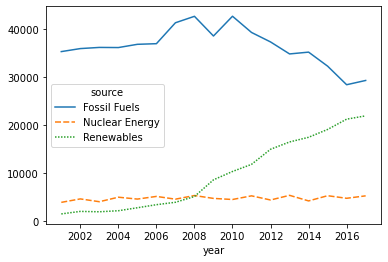

In [30]:
# basically do #2 but better
sns.lineplot(data=source_per_year.T)
plt.show()

## #5

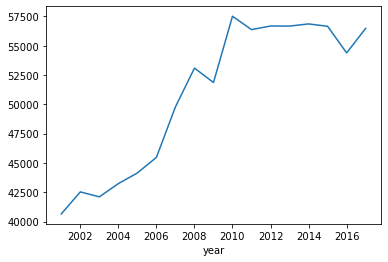

In [31]:
# is total generation increasing over time?
df.groupby('year').total_generated.max().plot()
plt.show()

In [32]:
# how would you control for energy source in looking at increasing energy generation?
# just separate them... avoid simpson's paradox

# express each number as a percentage of the year's total
df[['source','contribution']].head(3)

,source,contribution
year,,
2001,Fossil Fuels,0.869868
2001,Nuclear Energy,0.094782
2001,Renewables,0.035350


# SF Temps, Bonus
Use the sf_temps dataset.

In [33]:
df = data.sf_temps()
df.index = df.date
del df['date']
df.head(2)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4


1. Create 4 categories for temperature: cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
3. Create pretty labels for time plots
4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

## #1

In [34]:
# bins for cold, cool, warm, hot
df = pd.concat([df, pd.cut(df.temp, bins=4, labels=['cold','cool', 'warm', 'hot'], )], axis=1)
df.columns = ['measurement', 'description']
df.head(3)

,measurement,description
date,,
2010-01-01 00:00:00,47.8,cold
2010-01-01 01:00:00,47.4,cold
2010-01-01 02:00:00,46.9,cold


## #2

In [35]:
# month-to-month change in each bin
# create new columns
df['month'] = df.index.month
df['cold_day'] = (df['description'] == 'cold').map({False:0,True:1})
df['cool_day'] = (df['description'] == 'cool').map({False:0,True:1})
df['warm_day'] = (df['description'] == 'warm').map({False:0,True:1})
df['hot_day'] = (df['description'] == 'hot').map({False:0,True:1})
df.sample(3)

,measurement,description,month,cold_day,cool_day,warm_day,hot_day
date,,,,,,,
2010-03-13 11:00:00,56.8,cool,3,0,1,0,0
2010-03-28 09:00:00,55.0,cool,3,0,1,0,0
2010-04-29 05:00:00,51.3,cold,4,1,0,0,0


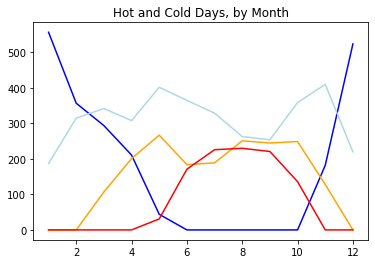

In [36]:
# plot each column
plt.plot(df.groupby('month').cold_day.sum(), c='blue')
plt.plot(df.groupby('month').cool_day.sum(), c='lightblue')
plt.plot(df.groupby('month').warm_day.sum(), c='orange')
plt.plot(df.groupby('month').hot_day.sum(), c='red')
plt.title('Hot and Cold Days, by Month')
plt.show()

## #3

In [37]:
# Create pretty labels for time plots
# I could, but this is bonus...

## #4

In [38]:
# Visualize the number of days of each month that fall into each bin by year 
# (e.g. x=month, y=n_days, hue=temp_bin) or st similar

# I basically already did this above... I'll leave it at that.

# Birdstrikes

In [39]:
original_df = data.birdstrikes()
original_df.head(2)

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Flight_Date,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1/8/90 0:00,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/9/90 0:00,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0


1. Explore the birdstrikes dataset.

In [40]:
# How is damage (our target!) classified
original_df.Effect__Amount_of_damage.unique()

array(['None', 'Substantial', 'Medium', 'Minor', 'C', 'B'], dtype=object)

In [41]:
# How are the birds (an independent variable) classified
original_df.Wildlife__Size.unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [42]:
# How are flight phases (an independent variable) classified
original_df.When__Phase_of_flight.unique()

array(['Climb', 'Approach', 'Take-off run', 'Descent', 'Landing Roll',
       'Taxi', 'Parked'], dtype=object)

In [43]:
# How specific is flight date
original_df.Flight_Date.str[7:].unique() # precision is day

array(['0:00', ' 0:00', '0 0:00', '1 0:00', '2 0:00', '3 0:00', '4 0:00',
       '5 0:00', '6 0:00', '7 0:00', '8 0:00', '9 0:00'], dtype=object)

In [44]:
# Let's consider this a time-series problem
original_df.index = original_df.Flight_Date.astype('datetime64')
del original_df['Flight_Date']

In [45]:
df = original_df.copy()
df.head(4)

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
Flight_Date,,,,,,,,,,,,,
1990-01-08,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1990-01-09,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
1990-01-11,BARKSDALE AIR FORCE BASE ARPT,B-52,None,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
1990-01-11,NEW ORLEANS INTL,B-737-300,Substantial,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0


In [46]:
# So some background research indicates the ranking of damage as the following definitions:
map1 = {'None':0,'Minor':1,'Medium':2,'Substantial':3,'C':4,'B':5}
# From what I can tell, minor, medium, and major are all below c-class incidents for birdstrikes.

In [47]:
# Let's remap the damage column to these rankings
df['Effect__Amount_of_damage'] = df['Effect__Amount_of_damage'].map(map1)

In [48]:
# And check our work
df[['Effect__Amount_of_damage']].value_counts().sort_index()

Effect__Amount_of_damage
0                           8939
1                            549
2                            186
3                            311
4                             14
5                              1
dtype: int64

In [49]:
# Looks good... now let's plot each line against each month
df['month'] = df.index.month
df.pivot_table(columns='month',index='Effect__Amount_of_damage')

Cost__Other                                          \
month                              1            2             3            4    
Effect__Amount_of_damage                                                        
0                           85.389776     0.689046      0.657328     2.551227   
1                           61.553191     0.000000    609.809524   216.500000   
2                            0.000000     0.000000  11298.363636     0.000000   
3                         3153.517241  1572.176471      0.000000  6814.409091   
4                                 NaN     0.000000      0.000000     0.000000   
5                                 NaN          NaN           NaN          NaN   

                                                                               \
month                              5           6             7             8    
Effect__Amount_of_damage                                                        
0                            0.565392   73.198212      0.628950      9.007840   
1                          228.666667  628.826087  11941.290323    582.512821   
2                            0.000000    0.000000      0.000000      0.000000   
3                         8756.695652    0.000000    556.833333  50977.026316   
4                            0.000000    0.000000      0.000000      0.000000   
5                                 NaN    0.000000           NaN           NaN   

                                                    ... Speed_IAS_in_knots  \
month                               9           10  ...                 3    
Effect__Amount_of_damage                            ...                      
0                            25.095160    1.052675  ...         156.890533   
1                           374.518519  681.216867  ...         171.302326   
2                           575.727273    0.000000  ...         167.300000   
3                         28963.281250  588.606061  ...         163.200000   
4                             0.000000         NaN  ...         180.000000   
5                                  NaN         NaN  ...                NaN   

                                                                          \
month                             4           5           6           7    
Effect__Amount_of_damage                                                   
0                         160.897638  156.771164  142.156177  141.922059   
1                         184.548387  172.640000  141.000000  170.263158   
2                         189.692308  210.909091  157.222222  165.000000   
3                         143.333333  138.625000  134.181818  135.526316   
4                                NaN  160.000000  162.500000  150.000000   
5                                NaN         NaN  105.000000         NaN   

                                                                          \
month                             8           9           10          11   
Effect__Amount_of_damage                                                   
0                         145.934834  156.439785  161.784824  159.588517   
1                         179.541667  181.222222  183.213115  177.282609   
2                         148.500000  164.153846  162.538462  178.214286   
3                         126.375000  141.000000  142.500000  154.523810   
4                         230.000000  136.666667         NaN  165.000000   
5                                NaN         NaN         NaN         NaN   

                                      
month                             12  
Effect__Amount_of_damage              
0                         139.580392  
1                         175.214286  
2                         170.000000  
3                         157.785714  
4                                NaN  
5                                NaN  

[6 rows x 48 columns]

I'm just now realizing there's a column for cost of the damage... well, that's awkward. I'll have to check my mishap rankings to see if my assumptions were correct. That number makes much more sense as a time series target than an ordinal column.

I might revisit this later, we'll see.